In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv(r"C:\Users\User\Desktop\MiD\Aufbereitete Daten\Trips_processed_sa.csv")

In [3]:
data.head()

,ID,Trip_no,Type_day,Departure(hh:mm),Arrival(hh:mm),Departure_t,Arrival_t,Departure,Arrival,Trip_duration,Whyfrom,Whyto,Stay_duration,Distance,Av_speed,Holiday,Work_status,W_ZWDE,W_ZWDP,W_ZWDF,Overnight,RegioStaR7,RegioStaR4,RegioStaRGem7,RegioStaRGem5,Mode,saison,Zweck
0,1124591,1,6,10:40:00,11:05:00,42,44,640,665,25,0,2,20.0,14.25,34.20,0,7,7704,504,7704,0,71,11,71,51,4,2,5
1,1124591,2,6,11:25:00,12:00:00,45,48,685,720,35,2,0,15.0,14.25,24.43,0,7,7704,7704,7704,0,71,11,71,51,4,2,8
2,1124591,3,6,12:15:00,12:35:00,49,50,735,755,20,0,2,20.0,13.30,39.90,0,7,7704,504,7704,0,71,11,71,51,4,2,5
3,1124591,4,6,12:55:00,13:25:00,51,53,775,805,30,2,0,65.0,13.30,26.60,0,7,7704,7704,7704,0,71,11,71,51,4,2,8
4,1124591,5,6,14:30:00,14:40:00,58,58,870,880,10,0,4,0.0,7.32,43.92,0,7,7704,7704,7704,0,71,11,71,51,4,2,6


In [4]:
# Einordnen der Ankunftszeiten in kategorische Tageszeiten

# Tageszeit:
# 0: Morgen: 5 bis 10 Uhr
# 1: Vormittag: 10 bis 12 Uhr
# 2: Mittag: 12 bis 14 Uhr
# 3: Nachmittag: 14 bis 18 Uhr
# 4: Abend: 18 bis 23 Uhr
# 5: Nacht: 23 bis 5 Uhr
data["Arrival_TZ"] = pd.Series()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


In [5]:
for i in range(len(data)):
    t = int(data.at[i, "Arrival"] / 60)
    # Morgen
    if 5 <= t < 10:
        data.at[i, "Arrival_TZ"] = 0
    # Vormittag
    elif 10 <= t < 12:
        data.at[i, "Arrival_TZ"] = 1
    # Mittag
    elif 12 <= t < 14: 
        data.at[i, "Arrival_TZ"] = 2
    # Nachmittag
    elif 14 <= t < 18: 
        data.at[i, "Arrival_TZ"] = 3
    # Abend
    elif 18 <= t < 23: 
        data.at[i, "Arrival_TZ"] = 4
    # Nacht
    elif 23 <= t < 24 or 0 <= t < 5: 
        data.at[i, "Arrival_TZ"] = 5        

data["Arrival_TZ"] = data["Arrival_TZ"].astype(int)  

In [6]:
data["W_ZWDE"].value_counts()

7704    22509
2202    11382
501      4012
502      1192
503       591
505       119
999        42
504        38
7705       25
Name: W_ZWDE, dtype: int64

In [7]:
einkaufen = data[data["Whyto"] == 2]
einkaufen["W_ZWDE"].value_counts()

501     4012
2202    3710
7704    3071
502     1192
503      591
505      119
999       42
504       38
Name: W_ZWDE, dtype: int64

In [8]:
einkaufen["W_ZWDP"].value_counts()

7704    6143
2202    3710
604      744
701      682
603      325
504      232
713      179
503      139
602      124
706      108
601      107
605       85
717       56
714       54
999       43
716       15
711       13
705       10
715        6
Name: W_ZWDP, dtype: int64

In [9]:
einkaufen["Arrival_TZ"].value_counts()

1    3963
3    3062
0    2880
2    2049
4     789
5      32
Name: Arrival_TZ, dtype: int64

In [10]:
len(einkaufen)

12775

In [11]:
# Aussortieren der Papi Werte in welchen Detail nicht erhoben
filt = ~ (einkaufen["W_ZWDE"] == 2202)
einkaufen = einkaufen[filt]

In [12]:
einkaufen["W_ZWDE"].value_counts()

501     4012
7704    3071
502     1192
503      591
505      119
999       42
504       38
Name: W_ZWDE, dtype: int64

In [13]:
einkaufen.reset_index(drop=True, inplace=True)

In [14]:
"""
Zustand Einkaufen setzt sich aus Einkauf und Private Erledigung zusammen.
Wege die kein Einkaufsweg sind (7704) sind private Erledigungen.
Übernehme für die Einträge die Aufschlüsselung aus den Details zur privaten Erledigung (W_ZWDP)
"""
for i in range(len(einkaufen)):
    if einkaufen.at[i, "W_ZWDE"] == 7704:
        einkaufen.at[i, "W_ZWDE"] = einkaufen.at[i, "W_ZWDP"]

In [15]:
einkaufen["W_ZWDE"].value_counts()

501     4012
502     1192
604      744
503      730
701      682
603      325
504      270
713      179
7704     149
602      124
505      119
706      108
601      107
605       85
999       85
717       56
714       54
716       15
711       13
705       10
715        6
Name: W_ZWDE, dtype: int64

In [16]:
# entferne restliche 7704 Einträge -> unplausible Werte
filt = ~ (einkaufen["W_ZWDE"] == 7704)
einkaufen = einkaufen[filt]

In [17]:
einkaufen["W_ZWDE"].value_counts()

501    4012
502    1192
604     744
503     730
701     682
603     325
504     270
713     179
602     124
505     119
706     108
601     107
999      85
605      85
717      56
714      54
716      15
711      13
705      10
715       6
Name: W_ZWDE, dtype: int64

In [18]:
len(einkaufen)

8916

In [19]:
einkaufen["W_ZWDE"].value_counts(normalize=True)

501    0.449978
502    0.133692
604    0.083445
503    0.081875
701    0.076492
603    0.036451
504    0.030283
713    0.020076
602    0.013908
505    0.013347
706    0.012113
601    0.012001
999    0.009533
605    0.009533
717    0.006281
714    0.006057
716    0.001682
711    0.001458
705    0.001122
715    0.000673
Name: W_ZWDE, dtype: float64

In [20]:
"""
501 = täglicher Bedarf = 38% -> Supermarkt
601 = Arztbesuch, andere medizinische Dienstleistung 14% -> Arzt, Physio, Apotheke
502 = sonstige Waren = 10% -> andere Geschäfte
604 = sonstiges = 7.8% -> Sonstiges
701 = Besuch/Treffen von Freunden, Verwandten, Bekannten = 5.5% -> Wohnort
504 = Dienstleistung (Friseur, Schuster etc.) = 5% -> Dienstleistung
503 = allgemeiner Einkaufsbummel ) = 4.4% -> andere Geschäfte
602 = Behörde, Bank, Post, Geldautomat = 3.8% -> Dienstleistung oder eigene Kategorie
603 = private Erledigung für andere Personen = 3.3% -> Sonstiges
713 = Kirche, Friedhof = 1.5% -> Kirche, Friedhof
605 = Betreuung Familienmitglieder, Bekannter = 1.4% -> Wohnort
706 = Restaurant, Gaststätte, Mittagessen etc. = 1.2% -> Restaurant, Gaststätte
505 = sonstiges = 1.2% -> Sonstiges

Zustände unter 1% -> vernachlässigen
"""

'\n501 = täglicher Bedarf = 38% -> Supermarkt\n601 = Arztbesuch, andere medizinische Dienstleistung 14% -> Arzt, Physio, Apotheke\n502 = sonstige Waren = 10% -> andere Geschäfte\n604 = sonstiges = 7.8% -> Sonstiges\n701 = Besuch/Treffen von Freunden, Verwandten, Bekannten = 5.5% -> Wohnort\n504 = Dienstleistung (Friseur, Schuster etc.) = 5% -> Dienstleistung\n503 = allgemeiner Einkaufsbummel ) = 4.4% -> andere Geschäfte\n602 = Behörde, Bank, Post, Geldautomat = 3.8% -> Dienstleistung oder eigene Kategorie\n603 = private Erledigung für andere Personen = 3.3% -> Sonstiges\n713 = Kirche, Friedhof = 1.5% -> Kirche, Friedhof\n605 = Betreuung Familienmitglieder, Bekannter = 1.4% -> Wohnort\n706 = Restaurant, Gaststätte, Mittagessen etc. = 1.2% -> Restaurant, Gaststätte\n505 = sonstiges = 1.2% -> Sonstiges\n\nZustände unter 1% -> vernachlässigen\n'

In [21]:
freizeit = data[data["Whyto"] == 3]
filt = ~ ((freizeit["W_ZWDF"] == 7704) | (freizeit["W_ZWDF"] == 2202)) 
freizeit = freizeit[filt]
freizeit["W_ZWDF"].value_counts()

701    1769
704     606
706     527
703     468
717     299
702     276
720     215
708     166
710     163
713     154
714     115
707      96
711      82
999      76
709      56
503      50
716      40
705      26
712      24
719      23
603      18
605       5
Name: W_ZWDF, dtype: int64

In [22]:
freizeit["W_ZWDF"].value_counts(normalize=True)

701    0.336696
704    0.115341
706    0.100305
703    0.089075
717    0.056909
702    0.052531
720    0.040921
708    0.031595
710    0.031024
713    0.029311
714    0.021888
707    0.018272
711    0.015607
999    0.014465
709    0.010659
503    0.009517
716    0.007613
705    0.004949
712    0.004568
719    0.004378
603    0.003426
605    0.000952
Name: W_ZWDF, dtype: float64

In [23]:
"""
704 = Sport  = 26.7 %
701 = Besuch/Treffen Freunde/Verwandte/Bekannte = 25.6%
706 = Restaurant/Gaststätte/Kneipe/Disco = 9.6%
717 = Hobby(z.B. Musizieren) = 7.4%
720 = sonstiges = 4.3%
714 = Ehrenamt, Verein, politische Aktivität = 4.0%
702 = Besuch kultureller Einrichtung (Kino, Theater, Museum)
703 = Besuch einer Veranstaltung (z.B. Fußballspiel, Markt, Popkonzert)
710 = 
"""

'\n704 = Sport  = 26.7 %\n701 = Besuch/Treffen Freunde/Verwandte/Bekannte = 25.6%\n706 = Restaurant/Gaststätte/Kneipe/Disco = 9.6%\n717 = Hobby(z.B. Musizieren) = 7.4%\n720 = sonstiges = 4.3%\n714 = Ehrenamt, Verein, politische Aktivität = 4.0%\n702 = Besuch kultureller Einrichtung (Kino, Theater, Museum)\n703 = Besuch einer Veranstaltung (z.B. Fußballspiel, Markt, Popkonzert)\n710 = \n'

In [24]:
repl_einkaufen= {605:"Wohnort", 
                701:"Wohnort",
                501:"Supermarkt",
                502:"Sonstiges Geschäft",
                503:"Sonstiges Geschäft",
                504:"Dienstleistung",
                601:"Medizinisch",
                602:"BBPG",
                706:"Gastronomie",
                713:"Kirche, Friedhof"}

einkaufen["W_ZWDE"] = einkaufen["W_ZWDE"].replace(repl_einkaufen)

In [25]:
for i in einkaufen.index:
    if not isinstance(einkaufen.at[i, "W_ZWDE"], str):
        einkaufen.at[i, "W_ZWDE"] = "Sonstiges"

In [26]:
einkaufen["W_ZWDE"].value_counts()

Supermarkt            4012
Sonstiges Geschäft    1922
Sonstiges             1427
Wohnort                767
Dienstleistung         270
Kirche, Friedhof       179
BBPG                   124
Gastronomie            108
Medizinisch            107
Name: W_ZWDE, dtype: int64

In [27]:
einkaufen_red = einkaufen[~ (einkaufen["W_ZWDE"] == "Sonstiges")]

In [28]:
einkaufen_red["W_ZWDE"].value_counts()

Supermarkt            4012
Sonstiges Geschäft    1922
Wohnort                767
Dienstleistung         270
Kirche, Friedhof       179
BBPG                   124
Gastronomie            108
Medizinisch            107
Name: W_ZWDE, dtype: int64

In [29]:
supermarkt = [0 for i in range(6)]
sonstiges_geschäft = [0 for i in range(6)]
medizinisch = [0 for i in range(6)]
wohnort = [0 for i in range(6)]
dienstleistung = [0 for i in range(6)]
bbpg = [0 for i in range(6)]
kirche_friedhof = [0 for i in range(6)]
gastronomie = [0 for i in range(6)]

In [30]:
einkaufen_grpd = einkaufen_red.groupby(["Arrival_TZ"])

In [31]:
einkaufen_grpd.head()

,ID,Trip_no,Type_day,Departure(hh:mm),Arrival(hh:mm),Departure_t,Arrival_t,Departure,Arrival,Trip_duration,Whyfrom,Whyto,Stay_duration,Distance,Av_speed,Holiday,Work_status,W_ZWDE,W_ZWDP,W_ZWDF,Overnight,RegioStaR7,RegioStaR4,RegioStaRGem7,RegioStaRGem5,Mode,saison,Zweck,Arrival_TZ
0,1124591,1,6,10:40:00,11:05:00,42,44,640,665,25,0,2,20.0,14.25,34.20,0,7,Dienstleistung,504,7704,0,71,11,71,51,4,2,5,1
1,1124591,3,6,12:15:00,12:35:00,49,50,735,755,20,0,2,20.0,13.30,39.90,0,7,Dienstleistung,504,7704,0,71,11,71,51,4,2,5,2
2,1127392,1,6,11:00:00,11:15:00,44,45,660,675,15,0,2,90.0,3.80,15.20,0,7,Supermarkt,7704,7704,0,75,22,74,53,2,2,4,1
3,1129591,1,6,9:20:00,9:55:00,37,39,560,595,35,0,2,65.0,34.20,58.63,0,7,Sonstiges Geschäft,7704,7704,0,73,11,76,54,4,2,4,0
4,1130791,3,6,19:00:00,19:10:00,76,76,1140,1150,10,0,2,25.0,6.65,39.90,0,1,Sonstiges Geschäft,7704,7704,0,76,22,75,53,4,2,4,4
5,1130792,1,6,10:15:00,10:25:00,41,41,615,625,10,0,2,65.0,7.60,45.60,0,2,Sonstiges Geschäft,7704,7704,0,76,22,75,53,4,2,4,1
6,1283571,1,6,10:00:00,11:10:00,40,44,600,670,70,0,2,50.0,2.85,2.44,0,1,Supermarkt,7704,7704,0,73,12,76,54,4,2,4,1
7,1285211,1,6,9:50:00,10:10:00,39,40,590,610,20,0,2,120.0,6.65,19.95,0,2,Wohnort,701,7704,0,73,11,75,53,4,2,5,1
8,1285211,3,6,13:00:00,13:10:00,52,52,780,790,10,0,2,1240.0,1.90,11.40,0,2,Supermarkt,7704,7704,0,73,11,75,53,4,2,4,2
10,1285212,3,6,13:00:00,13:10:00,52,52,780,790,10,0,2,215.0,1.90,11.40,0,1,Supermarkt,7704,7704,0,73,11,75,53,4,2,4,2


In [32]:
for t, group in einkaufen_grpd:
    counts = group["W_ZWDE"].value_counts(normalize=True)
    if counts.get("Supermarkt"):
        supermarkt[t] = counts["Supermarkt"]
        
    if counts.get("Sonstiges Geschäft"):
        sonstiges_geschäft[t] = counts["Sonstiges Geschäft"]
        
    if counts.get("Medizinisch"):
        medizinisch[t] = counts["Medizinisch"]
        
    if counts.get("Wohnort"):
        wohnort[t] = counts["Wohnort"]
        
    if counts.get("Dienstleistung"):
        dienstleistung[t] = counts["Dienstleistung"]
        
    if counts.get("BBPG"):
        bbpg[t] = counts["BBPG"]
    
    if counts.get("Kirche, Friedhof"):
        kirche_friedhof[t] = counts["Kirche, Friedhof"]
        
    if counts.get("Gastronomie"):
        gastronomie[t] = counts["Gastronomie"]

In [33]:
supermarkt

[0.6987668819729889,
 0.5484008528784649,
 0.48049792531120333,
 0.43270868824531517,
 0.4199134199134199,
 0.07692307692307693]

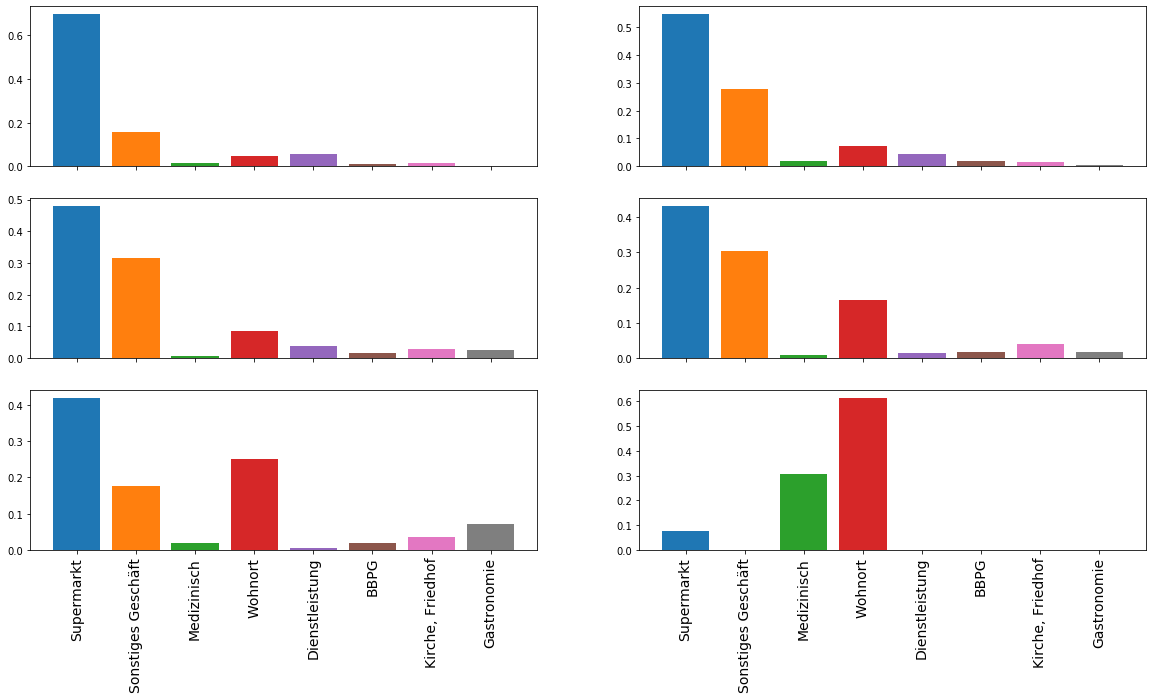

In [34]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

fig, (axs) = plt.subplots(3, 2, figsize=(20,10))
axs = [ax for sublist in axs for ax in sublist]
x_ticks = ["Supermarkt", "Sonstiges Geschäft", "Medizinisch", "Wohnort", "Dienstleistung", "BBPG", "Kirche, Friedhof", "Gastronomie"]
for i in range(6):
    axs[i].bar(0, supermarkt[i], label="Supermarkt")
    axs[i].bar(1, sonstiges_geschäft[i], label="Sonstiges Geschäft")
    axs[i].bar(2, medizinisch[i], label="Medizinisch")
    axs[i].bar(3, wohnort[i], label="Wohnort")
    axs[i].bar(4, dienstleistung[i], label="Dienstleistung")
    axs[i].bar(5, bbpg[i], label="BBPG")
    axs[i].bar(6, kirche_friedhof[i], label="Kirche, Friedhof")
    axs[i].bar(7, gastronomie[i], label="Gastronomie")
    if i > 3:
        plt.sca(axs[i])
        plt.xticks([i for i in range(8)], x_ticks, rotation=90, fontsize=14)
    else:
        plt.sca(axs[i])
        plt.xticks([i for i in range(8)], [])
    


In [35]:
colors = [(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)];

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'clmodern',
          'text.latex.unicode': True,
          }
sns.set(font_scale=1, style="whitegrid", rc=params) 
sns.set_palette(colors);

C:\Users\User\anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]


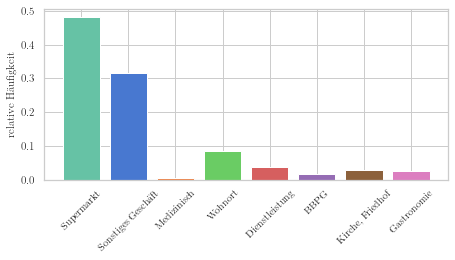

In [36]:
# Plot für Ausarbeitung 

fig = plt.figure(figsize=(6.2596, 3))
x_ticks = ["Supermarkt", "Sonstiges Geschäft", "Medizinisch", "Wohnort", "Dienstleistung", "BBPG", "Kirche, Friedhof", "Gastronomie"];

plt.bar(0, supermarkt[2], label="Supermarkt")
plt.bar(1, sonstiges_geschäft[2], label="Sonstiges Geschäft")
plt.bar(2, medizinisch[2], label="Medizinisch")
plt.bar(3, wohnort[2], label="Wohnort")
plt.bar(4, dienstleistung[2], label="Dienstleistung")
plt.bar(5, bbpg[2], label="BBPG")
plt.bar(6, kirche_friedhof[2], label="Kirche, Friedhof")
plt.bar(7, gastronomie[2], label="Gastronomie")
plt.tight_layout()

plt.xticks([i for i in range(8)], x_ticks, rotation=45, fontsize=10)
plt.ylabel("relative Häufigkeit", fontsize=11)

path = r"C:\Users\User\Desktop\Masterarbeit\Masterarbeit Latex\Abbildungen\Einkaufen-Haeufigkeit.pdf"
#fig.savefig(path, dpi=1000, bbox_inches='tight')

In [37]:
supermarkt[2]

0.48049792531120333

In [38]:
einkaufen_dict = {"Supermarkt":supermarkt, "Sonstiges Geschäft":sonstiges_geschäft, "Medizinisch":medizinisch, "Wohnort":wohnort,
                  "Dienstleistung":dienstleistung, "BBPG":bbpg, "Kirche, Friedhof":kirche_friedhof, "Gastronomie":gastronomie}

In [39]:
# Freizeit
freizeit.head()

,ID,Trip_no,Type_day,Departure(hh:mm),Arrival(hh:mm),Departure_t,Arrival_t,Departure,Arrival,Trip_duration,Whyfrom,Whyto,Stay_duration,Distance,Av_speed,Holiday,Work_status,W_ZWDE,W_ZWDP,W_ZWDF,Overnight,RegioStaR7,RegioStaR4,RegioStaRGem7,RegioStaRGem5,Mode,saison,Zweck,Arrival_TZ
12,1127393,1,6,13:00:00,13:30:00,52,54,780,810,30,0,3,60.0,11.40,22.80,0,1,7704,7704,503,0,75,22,74,53,2,2,7,2
16,1130791,1,6,9:00:00,9:35:00,36,38,540,575,35,0,3,515.0,28.50,48.86,0,1,7704,7704,704,0,76,22,75,53,4,2,7,0
22,1130792,3,6,17:30:00,17:45:00,70,71,1050,1065,15,0,3,130.0,4.75,19.00,0,2,7704,7704,701,0,76,22,75,53,4,2,7,3
29,1137141,1,6,15:45:00,16:35:00,63,66,945,995,50,0,3,40.0,40.85,49.02,0,7,7704,7704,710,0,73,11,75,53,2,2,7,3
43,1285212,4,6,16:45:00,17:05:00,67,68,1005,1025,20,2,3,1005.0,7.60,22.80,0,1,7704,7704,717,0,73,11,75,53,4,2,7,3


In [40]:
freizeit["W_ZWDF"].value_counts()

701    1769
704     606
706     527
703     468
717     299
702     276
720     215
708     166
710     163
713     154
714     115
707      96
711      82
999      76
709      56
503      50
716      40
705      26
712      24
719      23
603      18
605       5
Name: W_ZWDF, dtype: int64

In [41]:
freizeit_repl = {
                605:"Wohnort",
                701:"Wohnort",
                503:"sonstiges Geschäft",
                706:"Gastronomie",
                713:"Kirche, Friedhof",
                #717:"Hobby",
                702:"Kulturelle Einrichtung",
                704:"Sportstätten",
                }

In [42]:
freizeit["W_ZWDF"] = freizeit["W_ZWDF"].replace(freizeit_repl)

In [43]:
# freizeit["W_ZWDF"].astype(int)

In [44]:
for i in freizeit.index:
    if not isinstance(freizeit.at[i, "W_ZWDF"], str):
        freizeit.at[i, "W_ZWDF"] = "Sonstiges"

In [45]:
freizeit["W_ZWDF"].value_counts()

Sonstiges                 1867
Wohnort                   1774
Sportstätten               606
Gastronomie                527
Kulturelle Einrichtung     276
Kirche, Friedhof           154
sonstiges Geschäft          50
Name: W_ZWDF, dtype: int64

In [46]:
len(freizeit)

5254

In [47]:
freizeit["Arrival_TZ"].value_counts(normalize=True)

3    0.356681
4    0.234488
1    0.159307
2    0.140274
0    0.098972
5    0.010278
Name: Arrival_TZ, dtype: float64

In [48]:
filt = ~ (freizeit["W_ZWDF"] == "Sonstiges")
freizeit = freizeit[filt]

In [49]:
freizeit_grpd = freizeit.groupby(["Arrival_TZ"])

In [50]:
sport = [0 for i in range(6)]
wohnort = [0 for i in range(6)]
gastro = [0 for i in range(6)]
#hobby = [0 for i in range(6)]
kulturell = [0 for i in range(6)]
kirche_friedhof = [0 for i in range(6)]
sonstiges_geschäft = [0 for i in range(6)]

In [51]:
for t, group in freizeit_grpd:
    counts = group["W_ZWDF"].value_counts(normalize=True)
    if counts.get("Sportstätten"):
        sport[t] = counts["Sportstätten"]
        
    if counts.get("Wohnort"):
        wohnort[t] = counts["Wohnort"]
        
    if counts.get("Gastronomie"):
        gastro[t] = counts["Gastronomie"]
        
    #if counts.get("Hobby"):
        #hobby[t] = counts["Hobby"]
        
    if counts.get("Kulturelle Einrichtung"):
        kulturell[t] = counts["Kulturelle Einrichtung"]
        
    if counts.get("Kirche, Friedhof"):
        kirche_friedhof[t] = counts["Kirche, Friedhof"]
    
    if counts.get("sonstiges Geschäft"):
        sonstiges_geschäft[t] = counts["sonstiges Geschäft"]

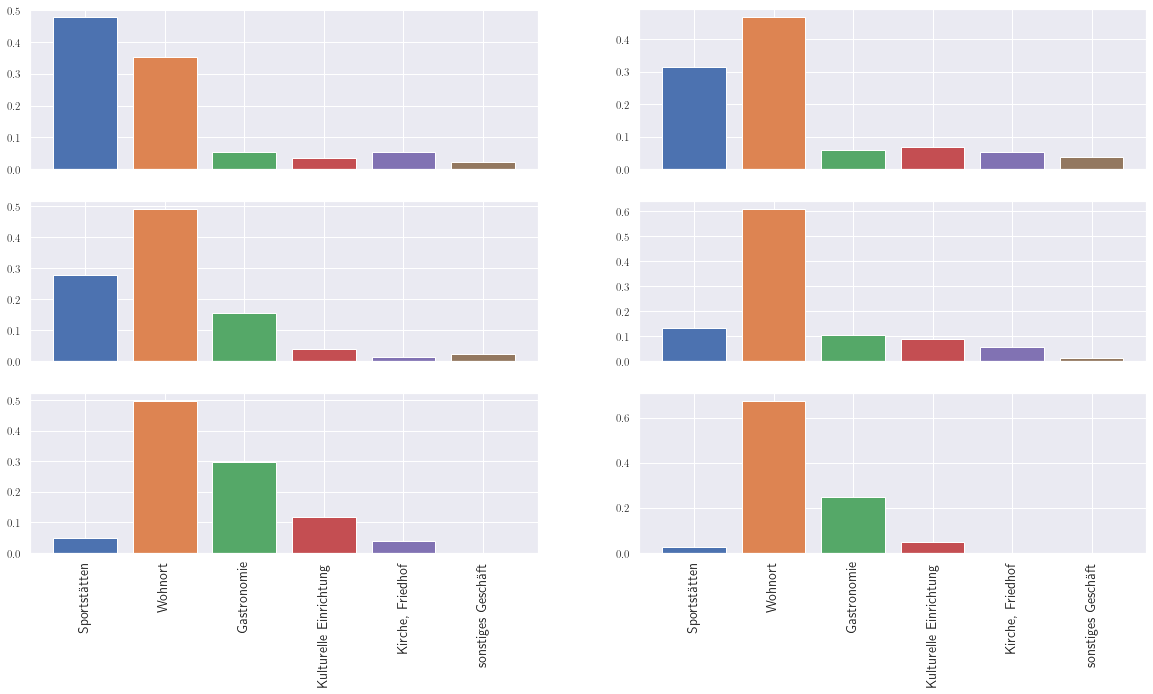

In [52]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

sns.set()
fig, (axs) = plt.subplots(3, 2, figsize=(20,10))
axs = [ax for sublist in axs for ax in sublist]
x_ticks = ["Sportstätten", "Wohnort", "Gastronomie", "Kulturelle Einrichtung", "Kirche, Friedhof", "sonstiges Geschäft"]
for i in range(6):
    axs[i].bar(0, sport[i], label="Sportstätte")
    axs[i].bar(1, wohnort[i], label="Wohnort")
    axs[i].bar(2, gastro[i], label="Gastronomie")
    #axs[i].bar(3, hobby[i], label="Hobby")
    axs[i].bar(3, kulturell[i], label="kulturelle Einrichtung")
    axs[i].bar(4, kirche_friedhof[i], label="Kirche, Friedhof")
    axs[i].bar(5, sonstiges_geschäft[i], label="sonstiges Geschäft")
    if i > 3:
        plt.sca(axs[i])
        plt.xticks([i for i in range(6)], x_ticks, rotation=90, fontsize=14)
    else:
        plt.sca(axs[i])
        plt.xticks([i for i in range(6)], [])
    


In [53]:
freizeit_dict = {"Sportstätten":sport, "Wohnort":wohnort, "Gastronomie":gastro, "Kulturell":kulturell,
                 "Kirche, Friedhof":kirche_friedhof, "Supermarkt":supermarkt}

In [54]:
einkaufen 

,ID,Trip_no,Type_day,Departure(hh:mm),Arrival(hh:mm),Departure_t,Arrival_t,Departure,Arrival,Trip_duration,Whyfrom,Whyto,Stay_duration,Distance,Av_speed,Holiday,Work_status,W_ZWDE,W_ZWDP,W_ZWDF,Overnight,RegioStaR7,RegioStaR4,RegioStaRGem7,RegioStaRGem5,Mode,saison,Zweck,Arrival_TZ
0,1124591,1,6,10:40:00,11:05:00,42,44,640,665,25,0,2,20.0,14.25,34.20,0,7,Dienstleistung,504,7704,0,71,11,71,51,4,2,5,1
1,1124591,3,6,12:15:00,12:35:00,49,50,735,755,20,0,2,20.0,13.30,39.90,0,7,Dienstleistung,504,7704,0,71,11,71,51,4,2,5,2
2,1127392,1,6,11:00:00,11:15:00,44,45,660,675,15,0,2,90.0,3.80,15.20,0,7,Supermarkt,7704,7704,0,75,22,74,53,2,2,4,1
3,1129591,1,6,9:20:00,9:55:00,37,39,560,595,35,0,2,65.0,34.20,58.63,0,7,Sonstiges Geschäft,7704,7704,0,73,11,76,54,4,2,4,0
4,1130791,3,6,19:00:00,19:10:00,76,76,1140,1150,10,0,2,25.0,6.65,39.90,0,1,Sonstiges Geschäft,7704,7704,0,76,22,75,53,4,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9059,99970312,1,6,10:15:00,10:30:00,41,42,615,630,15,0,2,10.0,3.33,13.32,0,1,Dienstleistung,504,7704,0,71,11,71,51,4,2,5,1
9060,99970312,2,6,10:40:00,10:55:00,42,43,640,655,15,2,2,125.0,4.75,19.00,0,1,Sonstiges Geschäft,7704,7704,0,71,11,71,51,4,2,4,1
9062,99970401,1,6,16:45:00,17:00:00,67,68,1005,1020,15,0,2,60.0,1.43,5.72,0,7,"Kirche, Friedhof",713,7704,0,71,11,71,51,2,2,5,3
9063,99971321,1,6,9:00:00,9:10:00,36,36,540,550,10,0,2,60.0,7.60,45.60,0,1,Supermarkt,7704,7704,0,77,22,77,55,2,2,4,0


In [55]:
import pickle 
import os 

res=[einkaufen_dict, freizeit_dict]

path = os.getcwd()+"\\Unterteilung_Einkaufen_Freizeit_sa.pickle"
pickle.dump(res, open(path, "wb"))

## Unterteilung Arbeitsplatz

In [56]:
arbeit = data[data["Whyto"] == 1]
arbeit["Zweck"].value_counts()

1    856
2    306
3     58
9     11
Name: Zweck, dtype: int64

In [57]:
arbeit = arbeit[~(arbeit["Zweck"] == 9)]

In [58]:
arbeit[arbeit["Zweck"] == 9]

,ID,Trip_no,Type_day,Departure(hh:mm),Arrival(hh:mm),Departure_t,Arrival_t,Departure,Arrival,Trip_duration,Whyfrom,Whyto,Stay_duration,Distance,Av_speed,Holiday,Work_status,W_ZWDE,W_ZWDP,W_ZWDF,Overnight,RegioStaR7,RegioStaR4,RegioStaRGem7,RegioStaRGem5,Mode,saison,Zweck,Arrival_TZ


In [59]:
arbeit_grpd = arbeit.groupby(["Arrival_TZ"])

In [60]:
arbeitsplatz = [i for i in range(6)]
schule = [i for i in range(6)]

In [61]:
for t, group in arbeit_grpd:
    counts = group["Zweck"].value_counts(normalize=True)
    print(counts)
    #arbeitsplatz[t] = counts[1] + counts[2]
    schule

1    0.793296
2    0.163408
3    0.043296
Name: Zweck, dtype: float64
1    0.496732
2    0.450980
3    0.052288
Name: Zweck, dtype: float64
1    0.604651
2    0.333333
3    0.062016
Name: Zweck, dtype: float64
1    0.544715
2    0.382114
3    0.073171
Name: Zweck, dtype: float64
1    0.563636
2    0.400000
3    0.036364
Name: Zweck, dtype: float64
1    0.818182
2    0.181818
Name: Zweck, dtype: float64


In [62]:
arbeit_grpd.keys

['Arrival_TZ']

In [63]:
arbeit_grpd[0]

KeyError: 'Column not found: 0'

In [ ]:
arbeit["Zweck"].value_counts(normalize=True)